In [ ]:
import pickle

with open("../model/random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("../model/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine("sqlite:///../data/oulad.db")
query = open("../src/features_student.sql").read()
df = pd.read_sql_query(query, engine)

df["dropout"] = df["final_result"].apply(lambda x: 1 if x == "Withdrawn" else 0)
X = df.drop(columns=["final_result", "dropout"])
y = df["dropout"]


In [25]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


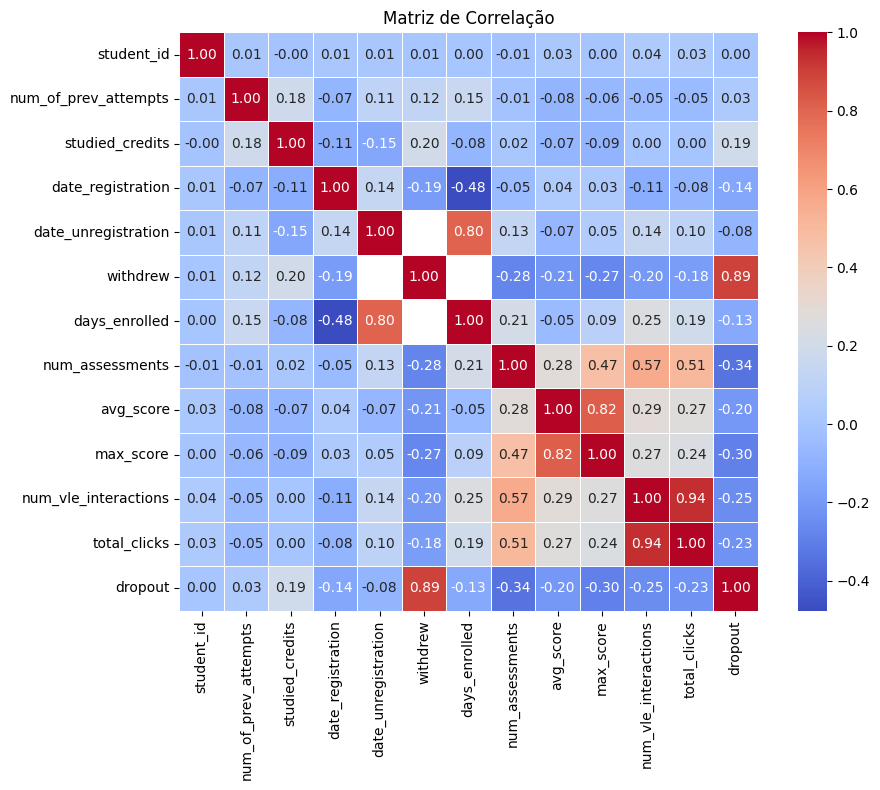

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
)

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['dropout'], test_size=0.2, random_state=42)

y_pred = model.predict(X_test)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Continuaram', 'Desistiram']).plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

,num__num_of_prev_attempts,num__studied_credits,num__days_enrolled,num__num_assessments,num__avg_score,num__max_score,num__num_vle_interactions,num__total_clicks,cat__code_module_AAA,cat__code_module_BBB,...,cat__imd_band_60-70%,cat__imd_band_70-80%,cat__imd_band_80-90%,cat__imd_band_90-100%,cat__imd_band_None,cat__highest_education_A Level or Equivalent,cat__highest_education_HE Qualification,cat__highest_education_Lower Than A Level,cat__highest_education_No Formal quals,cat__highest_education_Post Graduate Qualification
0,-0.340229,3.901543,0.000000,-6.687975e-01,0.650755,-0.184538,-0.544962,-0.350706,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.340229,-0.481083,0.000000,-6.687975e-01,-0.456072,-1.229290,-0.016548,-0.094901,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.340229,-0.481083,-0.769208,2.158941e-16,0.000000,0.000000,-0.815944,-0.684121,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.340229,-0.481083,0.000000,-6.687975e-01,0.225052,0.024413,0.509608,0.274256,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.340229,-0.481083,0.000000,-6.687975e-01,-1.307477,-0.881039,-0.192686,-0.299647,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,-0.340229,-0.481083,0.000000,-6.687975e-01,-0.342551,-0.602439,0.645098,0.420795,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


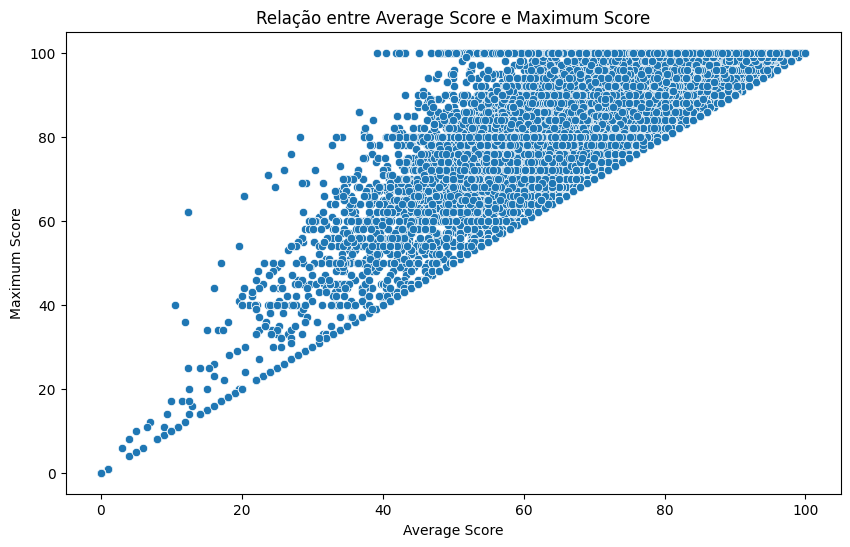

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_score', y='max_score')
plt.title('Relação entre Average Score e Maximum Score')
plt.xlabel('Average Score')
plt.ylabel('Maximum Score')
plt.show()

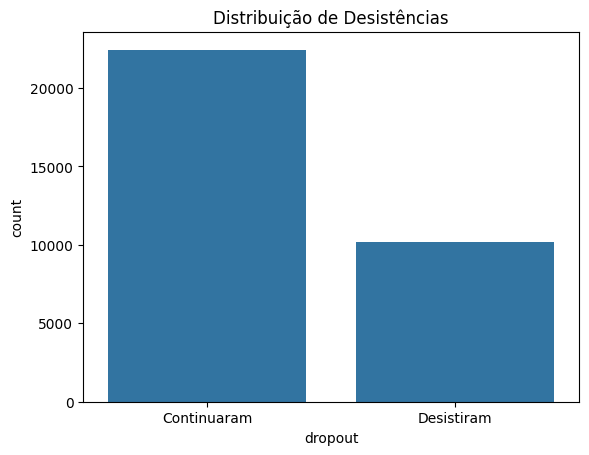

In [17]:
sns.countplot(data=df, x= 'dropout')
plt.title("Distribuição de Desistências")
plt.xticks([0, 1], ['Continuaram', 'Desistiram'])
plt.show()